# 2. Modeling

### Three Convolutional Neural Network (CNN) models are trained to classify traffic sign images. The dataset of traffic sign images has been preprocessed, and now three different architectures are explored to find the best performing model.

**Model Architecture v1:**
  - Convolution Layers: Three convolution layers with increasing kernals of 32, 64, and 128.
  - Pooling Layers: Max pooling applied after each convolution layer.
  - Fully Connected Layer: A dense layer of 128 neurons with ReLU activation.
  - Output Layer: Softmax activation for multi-class classification.

**Model Architecture v2:**
  - Convolution Layers: Four convolution layers with increasing kernals of 32, 64, 128, and 256.
  - Pooling Layers: Max pooling applied after each convolution layer.
  - Fully Connected Layer: A dense layer of 128 neurons with ReLU activation.
  - Output Layer: Softmax activation for multi-class classification.

**Transfer Learning with VGG19:**
  - Base Model: VGG19 pretrained on ImageNet, with trainable parameters frozen.
  - Global Average Pooling: Reduces spatial dimensions.
  - Fully Connected Layer: A dense layer of 128 neurons with ReLU activation.
  - Output Layer: Softmax activation for multi-class classification.

**Training Models**
  - Early Stopping: Prevents overfitting by monitoring validation loss and restoring best weights.
  - Training Process: Each model is trained using the Adam optimizer and categorical cross-entropy loss.

**Visualizing Layer Outputs:**
  - Visualization Function: A custom function to visualize the outputs of specific layers in the models. This helps in understanding how the network processes the image through each layer.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from keras.callbacks import EarlyStopping
from keras.models import load_model
from tensorflow.keras.applications import VGG19

In [2]:
# Load the split data
X_train = np.load('data/preproc_data/X_train.npy')
X_val = np.load('data/preproc_data/X_val.npy')
X_test = np.load('data/preproc_data/X_test.npy')
y_train = np.load('data/preproc_data/y_train.npy')
y_val = np.load('data/preproc_data/y_val.npy')
y_test = np.load('data/preproc_data/y_test.npy')

In [3]:
BATCH_SIZE = 32
EPOCHS = 15

In [4]:
def create_model_v1(num_classes):
    model_v1 = Sequential([
        Conv2D(32, (2, 2), input_shape=(224, 224, 3), padding='valid', name='Convolution-1', activation='relu'),
        MaxPooling2D(pool_size=(2, 2), name='Pooling-1'),

        Conv2D(64, (2, 2), padding='valid', name='Convolution-2', activation='relu'),
        MaxPooling2D(pool_size=(2, 2), name='Pooling-2'),

        Conv2D(128, (2, 2), padding='valid', name='Convolution-3', activation='relu'),
        MaxPooling2D(pool_size=(2, 2), name='Pooling-3'),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.25),

        Dense(num_classes, activation='softmax'),
    ])

    model_v1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model_v1

In [5]:
def create_model_v2(num_classes):
    model_v2 = Sequential([
    
        Conv2D(32, (3, 3), input_shape=(224, 224, 3), padding='valid', name='Convolution-1', activation='relu'),
        MaxPooling2D(pool_size=(2, 2), name='Pooling-1'),

        Conv2D(64, (3, 3), padding='valid', name='Convolution-2', activation='relu'),
        MaxPooling2D(pool_size=(2, 2), name='Pooling-2'),

        Conv2D(128, (2, 2), padding='valid', name='Convolution-3', activation='relu'),
        MaxPooling2D(pool_size=(2, 2), name='Pooling-3'),
        
        Conv2D(256, (2, 2), padding='valid', name='Convolution-4', activation='relu'),
        MaxPooling2D(pool_size=(2, 2), name='Pooling-4'),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.25),

        Dense(num_classes, activation='softmax'),
        ])

    model_v2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model_v2

In [6]:
def create_model_vgg19(num_classes):
    base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    for layer in base_model.layers:
        layer.trainable = False

    model_vgg19 = Sequential([
        base_model,

        GlobalAveragePooling2D(),
        
        Dense(128, activation='relu'),
        Dropout(0.25),

        Dense(num_classes, activation='softmax'),
    ])

    model_vgg19.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model_vgg19

In [7]:
def train_model(model, X_train, y_train, X_val, y_val):
    
    """
    This function trains a given model using the provided training and validation data. 
    It also applies early stopping to prevent overfitting.
    
    Args:
        model (keras.Model): The model to be trained.
        X_train (numpy.ndarray): Training data.
        y_train (numpy.ndarray): Training labels.
        X_val (numpy.ndarray): Validation data.
        y_val (numpy.ndarray): Validation labels.
    """
    
    es = EarlyStopping(
        monitor='val_loss', 
        patience=5, 
        restore_best_weights=True)
    
    history = model.fit(
        X_train, y_train, 
        validation_data=(X_val, y_val), 
        epochs=EPOCHS, 
        batch_size=BATCH_SIZE, 
        callbacks=[es],
        shuffle = True)
    
    return history

In [8]:
model_v1 = create_model_v1(y_train.shape[1])
model_v1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Convolution-1 (Conv2D)      (None, 223, 223, 32)      416       
                                                                 
 Pooling-1 (MaxPooling2D)    (None, 111, 111, 32)      0         
                                                                 
 Convolution-2 (Conv2D)      (None, 110, 110, 64)      8256      
                                                                 
 Pooling-2 (MaxPooling2D)    (None, 55, 55, 64)        0         
                                                                 
 Convolution-3 (Conv2D)      (None, 54, 54, 128)       32896     
                                                                 
 Pooling-3 (MaxPooling2D)    (None, 27, 27, 128)       0         
                                                                 
 flatten (Flatten)           (None, 93312)             0

In [9]:
history_v1 = train_model(model_v1, X_train, y_train, X_val, y_val)

Epoch 1/15
68/68 [==============================] - 15s 218ms/step - loss: 2.0165 - accuracy: 0.3116 - val_loss: 1.4538 - val_accuracy: 0.4778
Epoch 2/15
68/68 [==============================] - 14s 208ms/step - loss: 1.1211 - accuracy: 0.6079 - val_loss: 0.7736 - val_accuracy: 0.7148
Epoch 3/15
68/68 [==============================] - 14s 210ms/step - loss: 0.5179 - accuracy: 0.8343 - val_loss: 0.5046 - val_accuracy: 0.8407
Epoch 4/15
68/68 [==============================] - 14s 212ms/step - loss: 0.2595 - accuracy: 0.9042 - val_loss: 0.4266 - val_accuracy: 0.8593
Epoch 5/15
68/68 [==============================] - 14s 212ms/step - loss: 0.1705 - accuracy: 0.9366 - val_loss: 0.3281 - val_accuracy: 0.8889
Epoch 6/15
68/68 [==============================] - 15s 214ms/step - loss: 0.1436 - accuracy: 0.9463 - val_loss: 0.3311 - val_accuracy: 0.8741
Epoch 7/15
68/68 [==============================] - 15s 216ms/step - loss: 0.1061 - accuracy: 0.9560 - val_loss: 0.3524 - val_accuracy: 0.8852

In [10]:
model_v1.evaluate(X_test, y_test)

9/9 [==============================] - 0s 52ms/step - loss: 0.3266 - accuracy: 0.9148


[0.32662826776504517, 0.914814829826355]

In [11]:
model_v1.save('model/model_v1.h5')
pd.DataFrame(history_v1.history).to_csv('model/history_v1.csv', index=False)

/Users/argishtiovsepyan/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


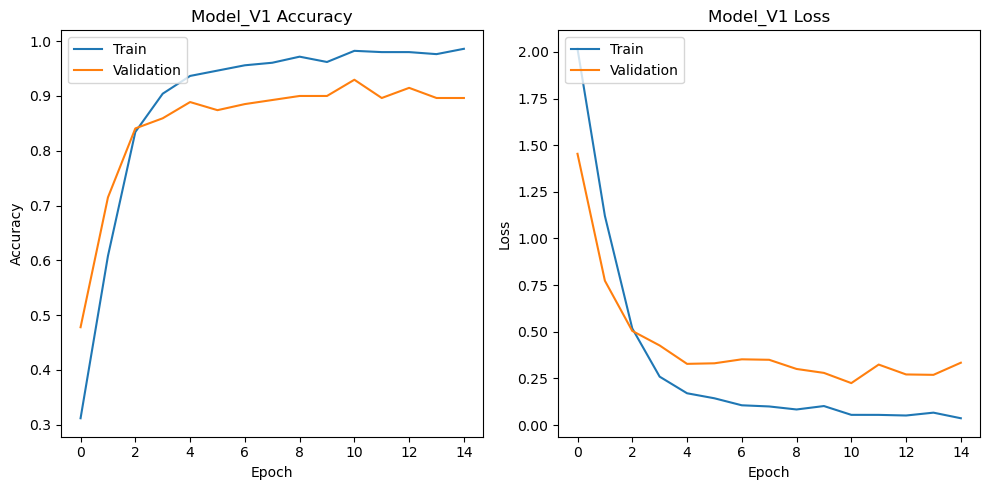

In [12]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history_v1.history['accuracy'])
plt.plot(history_v1.history['val_accuracy'])
plt.title('Model_V1 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_v1.history['loss'])
plt.plot(history_v1.history['val_loss'])
plt.title('Model_V1 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.savefig('images/presentation/model_v1_graph')
plt.show()

In [13]:
model_v2 = create_model_v2(y_train.shape[1])
model_v2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Convolution-1 (Conv2D)      (None, 222, 222, 32)      896       
                                                                 
 Pooling-1 (MaxPooling2D)    (None, 111, 111, 32)      0         
                                                                 
 Convolution-2 (Conv2D)      (None, 109, 109, 64)      18496     
                                                                 
 Pooling-2 (MaxPooling2D)    (None, 54, 54, 64)        0         
                                                                 
 Convolution-3 (Conv2D)      (None, 53, 53, 128)       32896     
                                                                 
 Pooling-3 (MaxPooling2D)    (None, 26, 26, 128)       0         
                                                                 
 Convolution-4 (Conv2D)      (None, 25, 25, 256)      

In [14]:
history_v2 = train_model(model_v2, X_train, y_train, X_val, y_val)

Epoch 1/15
68/68 [==============================] - 23s 328ms/step - loss: 1.8388 - accuracy: 0.3241 - val_loss: 1.3178 - val_accuracy: 0.5074
Epoch 2/15
68/68 [==============================] - 22s 325ms/step - loss: 1.0684 - accuracy: 0.6204 - val_loss: 0.8251 - val_accuracy: 0.7111
Epoch 3/15
68/68 [==============================] - 22s 325ms/step - loss: 0.5319 - accuracy: 0.8111 - val_loss: 0.3724 - val_accuracy: 0.8704
Epoch 4/15
68/68 [==============================] - 22s 326ms/step - loss: 0.2761 - accuracy: 0.8926 - val_loss: 0.2854 - val_accuracy: 0.8815
Epoch 5/15
68/68 [==============================] - 22s 328ms/step - loss: 0.1794 - accuracy: 0.9324 - val_loss: 0.2129 - val_accuracy: 0.9037
Epoch 6/15
68/68 [==============================] - 22s 327ms/step - loss: 0.1265 - accuracy: 0.9463 - val_loss: 0.2380 - val_accuracy: 0.9148
Epoch 7/15
68/68 [==============================] - 22s 327ms/step - loss: 0.1256 - accuracy: 0.9468 - val_loss: 0.2884 - val_accuracy: 0.9111

In [15]:
model_v2.evaluate(X_test, y_test)

9/9 [==============================] - 1s 77ms/step - loss: 0.2318 - accuracy: 0.9296


[0.23183797299861908, 0.9296296238899231]

In [16]:
model_v2.save('model/model_v2.h5')
pd.DataFrame(history_v2.history).to_csv('model/history_v2.csv', index=False)

/Users/argishtiovsepyan/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


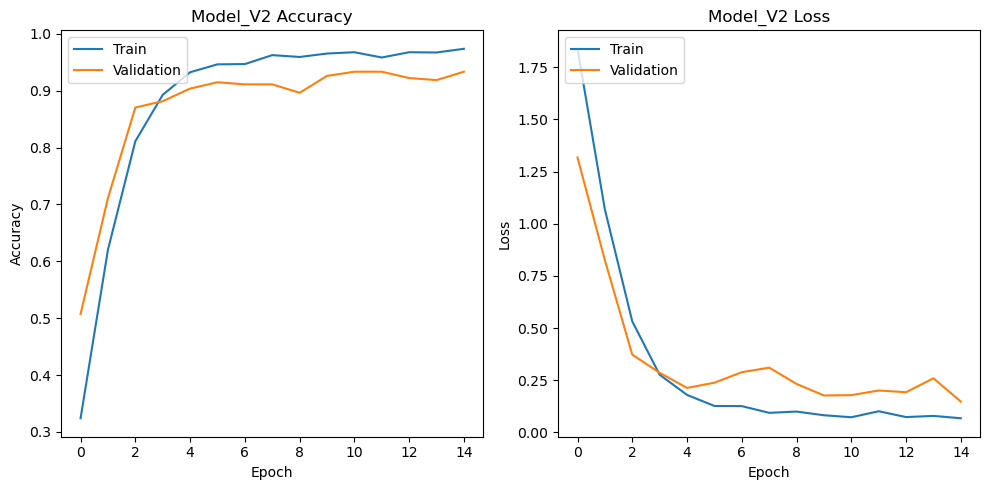

In [17]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history_v2.history['accuracy'])
plt.plot(history_v2.history['val_accuracy'])
plt.title('Model_V2 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_v2.history['loss'])
plt.plot(history_v2.history['val_loss'])
plt.title('Model_V2 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.savefig('images/presentation/model_v2_graph')
plt.show()

In [18]:
model_vgg19 = create_model_vgg19(y_train.shape[1])

In [19]:
model_vgg19.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_4 (Dense)             (None, 128)               65664     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 9)                 1161      
                                                                 
Total params: 20091209 (76.64 MB)
Trainable params: 66825 (261.04 KB)
Non-trainable params: 20024384 (76.39 MB)
________

In [20]:
history_vgg19 = train_model(model_vgg19, X_train, y_train, X_val, y_val)

Epoch 1/15
68/68 [==============================] - 1120s 17s/step - loss: 2.0228 - accuracy: 0.2597 - val_loss: 1.8124 - val_accuracy: 0.4148
Epoch 2/15
68/68 [==============================] - 173s 3s/step - loss: 1.7003 - accuracy: 0.4463 - val_loss: 1.5106 - val_accuracy: 0.5444
Epoch 3/15
68/68 [==============================] - 173s 3s/step - loss: 1.4525 - accuracy: 0.5255 - val_loss: 1.3176 - val_accuracy: 0.5667
Epoch 4/15
68/68 [==============================] - 174s 3s/step - loss: 1.2636 - accuracy: 0.6005 - val_loss: 1.1675 - val_accuracy: 0.6593
Epoch 5/15
68/68 [==============================] - 174s 3s/step - loss: 1.1125 - accuracy: 0.6542 - val_loss: 1.0011 - val_accuracy: 0.7111
Epoch 6/15
68/68 [==============================] - 174s 3s/step - loss: 0.9875 - accuracy: 0.6963 - val_loss: 0.9273 - val_accuracy: 0.7148
Epoch 7/15
68/68 [==============================] - 173s 3s/step - loss: 0.9171 - accuracy: 0.7144 - val_loss: 0.8808 - val_accuracy: 0.7333
Epoch 8/15


In [21]:
model_vgg19.evaluate(X_test, y_test)

9/9 [==============================] - 19s 2s/step - loss: 0.4471 - accuracy: 0.8593


[0.4470811188220978, 0.8592592477798462]

In [22]:
model_v2.save('model/model_vgg19.h5')
pd.DataFrame(history_vgg19.history).to_csv('model/history_vgg19.csv', index=False)

/Users/argishtiovsepyan/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


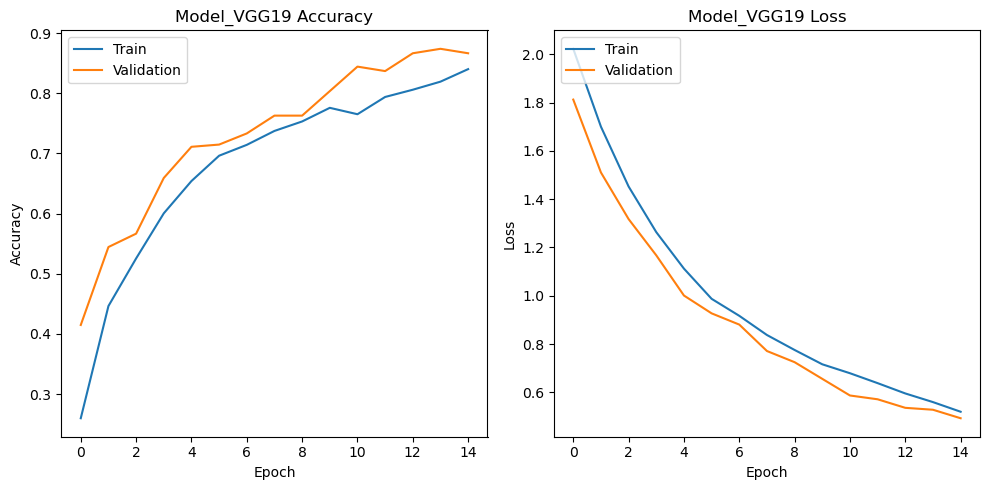

In [23]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history_vgg19.history['accuracy'])
plt.plot(history_vgg19.history['val_accuracy'])
plt.title('Model_VGG19 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_vgg19.history['loss'])
plt.plot(history_vgg19.history['val_loss'])
plt.title('Model_VGG19 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [24]:
def visualize_layers(image, model, layers):
    """
    This function visualizes the outputs for each layer in a model.

    Args:
        image (numpy.ndarray): The input image.
        model (tf.keras.Model): The pre-trained model.
        layers (list): The list of layers to visualize.
    """
    fig, axs = plt.subplots(1, len(layers) + 1, figsize=(20, 20))

    axs[0].imshow(image)
    axs[0].set_title('Original Image')
    axs[0].axis('off')

    for i, layer_name in enumerate(layers):
        intermediate_layer_model = tf.keras.Model(inputs=model.input, outputs=model.get_layer(layer_name).output)
        intermediate_output = intermediate_layer_model.predict(np.expand_dims(image, axis=0))

        # Take the mean over the channel dimension to create a 2D image
        intermediate_output_mean = intermediate_output.mean(axis=-1)[0]
        
        axs[i + 1].imshow(intermediate_output_mean, cmap='jet')
        axs[i + 1].set_title(f'Output Layer: {layer_name}')
        axs[i + 1].axis('off')

    plt.tight_layout()
    plt.savefig(f'images/presentation/{model}.png')
    plt.show()

1/1 [==============================] - 0s 23ms/step


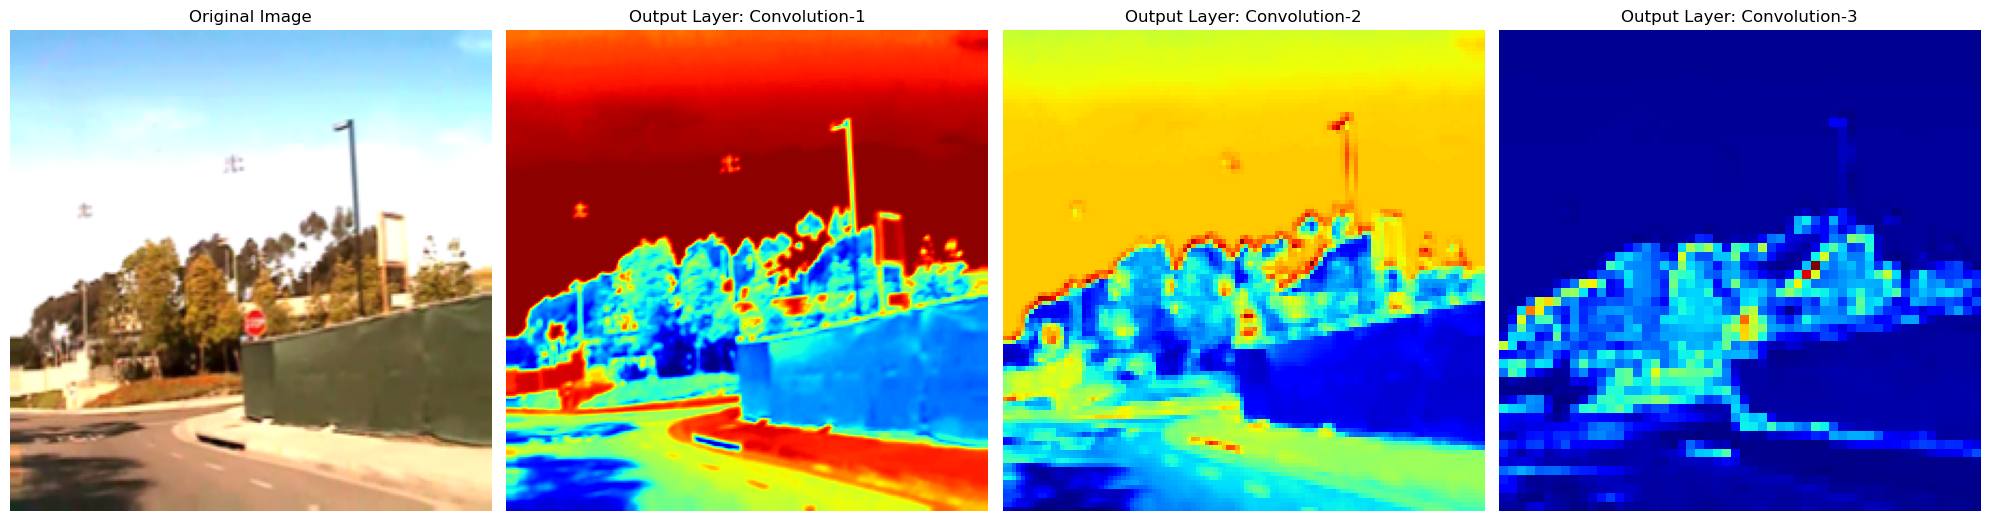

In [40]:
model = load_model('model/model_v1.h5')
layers = ['Convolution-1', 'Convolution-2', 'Convolution-3']
image = X_train[185]

visualize_layers(image, model, layers)

1/1 [==============================] - 0s 28ms/step


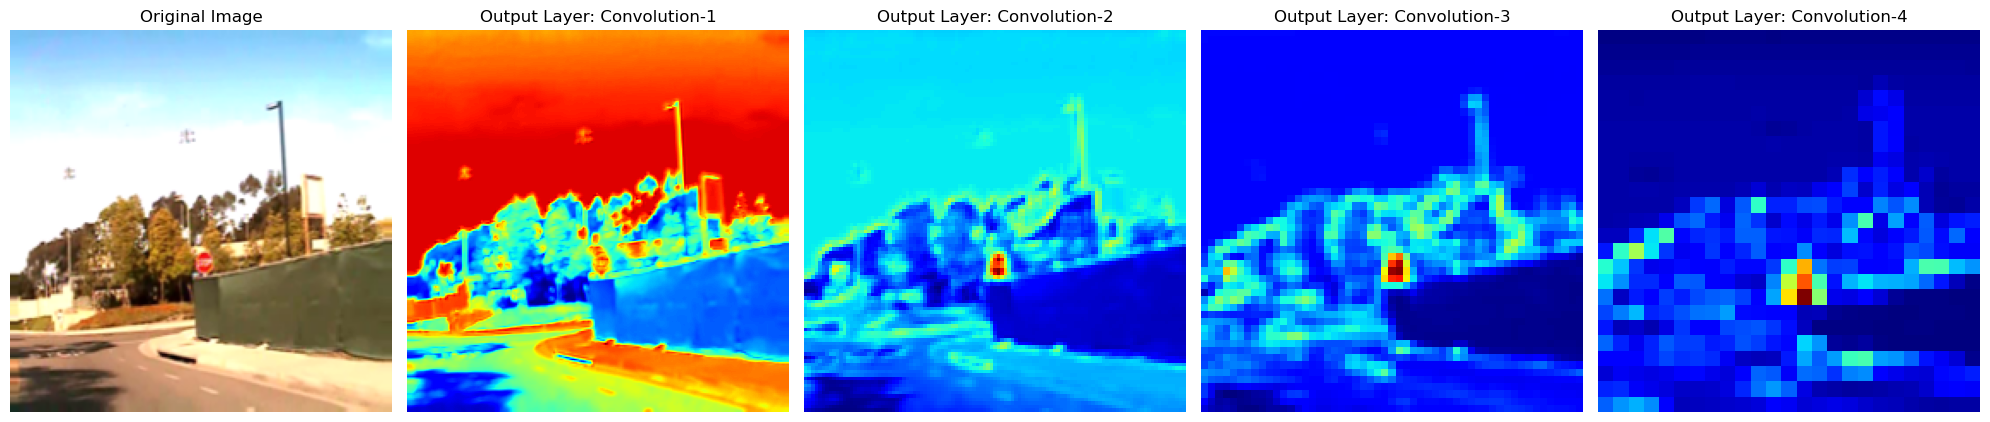

In [41]:
model = load_model('model/model_v2.h5')
layers = ['Convolution-1', 'Convolution-2', 'Convolution-3', 'Convolution-4']
image = X_train[185]

visualize_layers(image, model, layers)